In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("sales_data.csv")


In [3]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel
0,1052,03-02-2023,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,9.00%,Cash,Online
1,1093,21-04-2023,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,11.00%,Cash,Retail
2,1015,21-09-2023,David,South,4631.23,30,Food,261.56,371.40,Returning,20.00%,Bank Transfer,Retail
3,1072,24-08-2023,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,2.00%,Credit Card,Retail
4,1061,24-03-2023,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,8.00%,Credit Card,Online


In [4]:
df.shape


(1000, 13)

In [5]:
df.columns


Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        1000 non-null   int64  
 1   Sale_Date         1000 non-null   object 
 2   Sales_Rep         1000 non-null   object 
 3   Region            1000 non-null   object 
 4   Sales_Amount      1000 non-null   float64
 5   Quantity_Sold     1000 non-null   int64  
 6   Product_Category  1000 non-null   object 
 7   Unit_Cost         1000 non-null   float64
 8   Unit_Price        1000 non-null   float64
 9   Customer_Type     1000 non-null   object 
 10  Discount          1000 non-null   object 
 11  Payment_Method    1000 non-null   object 
 12  Sales_Channel     1000 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 101.7+ KB


In [7]:
df.describe()


,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839
min,1001.000000,100.120000,1.000000,60.280000,167.120000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000


In [8]:
df.isnull().sum()


Product_ID          0
Sale_Date           0
Sales_Rep           0
Region              0
Sales_Amount        0
Quantity_Sold       0
Product_Category    0
Unit_Cost           0
Unit_Price          0
Customer_Type       0
Discount            0
Payment_Method      0
Sales_Channel       0
dtype: int64

In [9]:
df = df.dropna()


In [10]:
df.dtypes


Product_ID            int64
Sale_Date            object
Sales_Rep            object
Region               object
Sales_Amount        float64
Quantity_Sold         int64
Product_Category     object
Unit_Cost           float64
Unit_Price          float64
Customer_Type        object
Discount             object
Payment_Method       object
Sales_Channel        object
dtype: object

In [12]:
df['Product_Category'].value_counts()


Product_Category
Clothing       268
Furniture      260
Electronics    246
Food           226
Name: count, dtype: int64

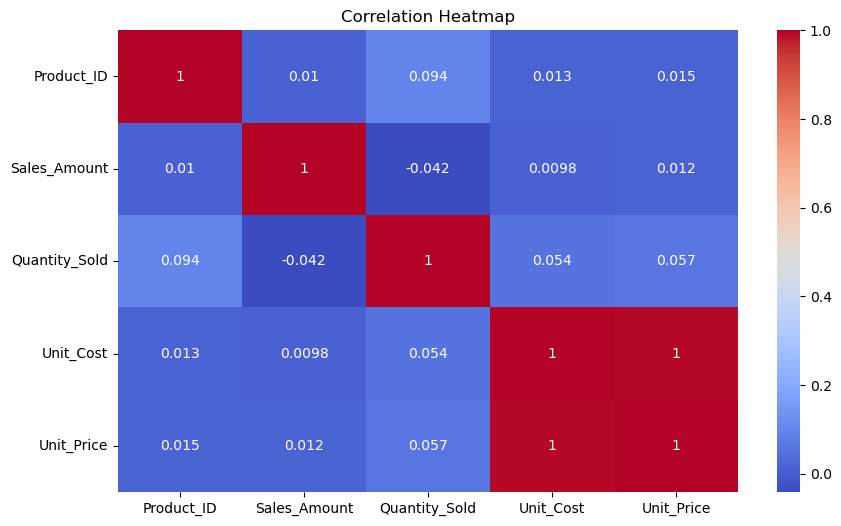

In [24]:
numeric_df = df.select_dtypes(include=['float64','int64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


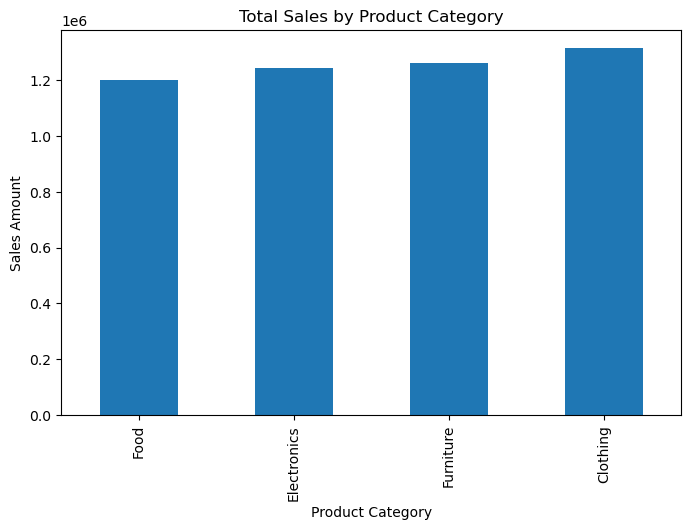

In [25]:
plt.figure(figsize=(8,5))
df.groupby('Product_Category')['Sales_Amount'].sum().sort_values().plot(kind='bar')
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Sales Amount")
plt.show()


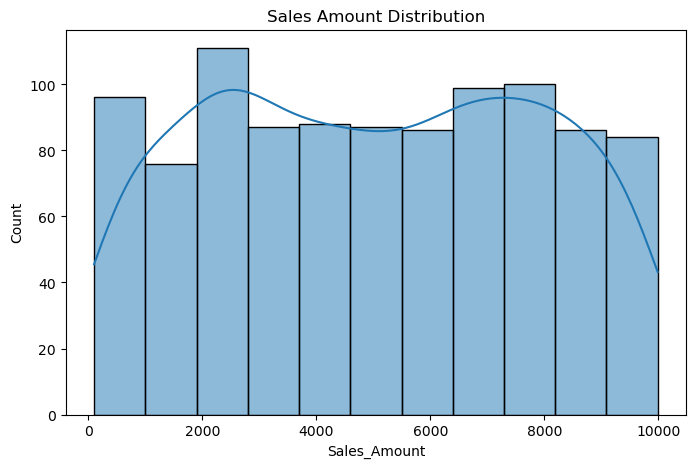

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sales_Amount'], kde=True)
plt.title("Sales Amount Distribution")
plt.show()


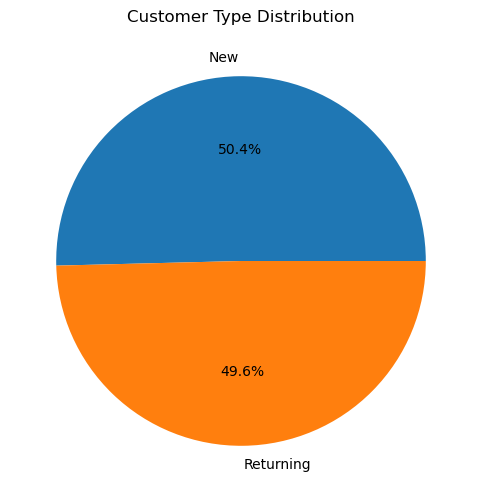

In [27]:
df['Customer_Type'].value_counts().plot(kind='pie', autopct="%1.1f%%", figsize=(6,6))
plt.title("Customer Type Distribution")
plt.ylabel("")
plt.show()


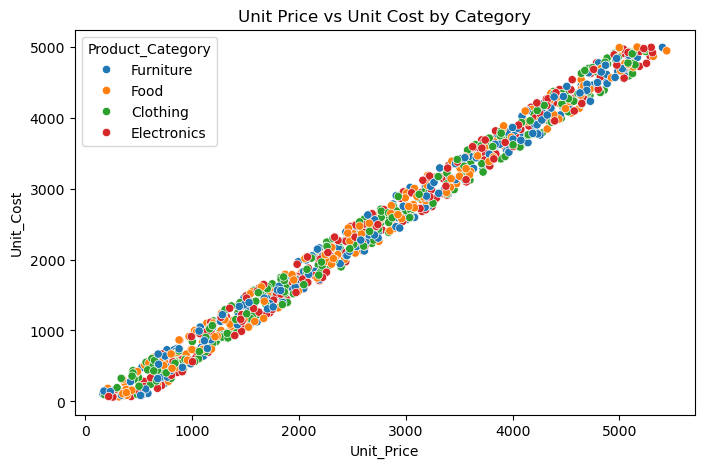

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Unit_Price", y="Unit_Cost", hue="Product_Category")
plt.title("Unit Price vs Unit Cost by Category")
plt.show()


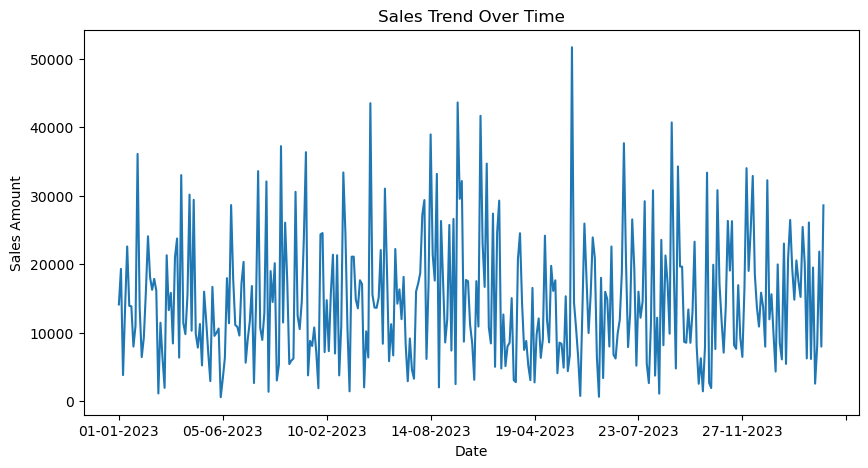

In [29]:
df.groupby('Sale_Date')['Sales_Amount'].sum().plot(figsize=(10,5))
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.show()
